Create a report and display the below calculated metrics, reports and inferences.

1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

2. Prepare a summary report for the merged data set.
 a. Get the column names and their corresponding data types
 b. Top/Bottom 10 observations
 c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
 d. Frequency tables for all the categorical variables

3. Generate histograms for all continuous variables and frequency bars for categorical variables.

4. Calculate the following information using the merged dataset :
 a. Time period of the available transaction data
 b. Count of transactions where the total amount of transaction was negative

5. Analyze which product categories are more popular among females vs male customers.

6. Which City code has the maximum customers and what was the percentage of customers from that city?

7. Which store type sells the maximum products by value and by quantity?

8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

9. What was the total amount earned from "Male" customers under the "Electronics" category?

10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

11. For all customers aged between 25 - 35, find out:
 a. What was the total amount spent for “Electronics” and “Books” product categories?
 b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

In [2]:
source = 'E:/Analytics Labs/python_CaseStudy/Python Foundation Case Study 1 - Retail Case Study/'
Customer = pd.read_csv(source+'Customer.csv')
prod_cat_info = pd.read_csv(source+'prod_cat_info.csv')
Transactions = pd.read_csv(source+'Transactions.csv')

In [3]:
Customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [4]:
prod_cat_info

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [5]:
Transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


### 1)  Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.


In [6]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [7]:
Customer.nunique()

customer_Id    5647
DOB            4056
Gender            2
city_code        10
dtype: int64

In [8]:
prod_cat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [9]:
prod_cat_info.nunique()

prod_cat_code         6
prod_cat              6
prod_sub_cat_code    12
prod_subcat          18
dtype: int64

In [10]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [11]:
Transactions.nunique()

transaction_id      20878
cust_id              5506
tran_date            1129
prod_subcat_code       12
prod_cat_code           6
Qty                    10
Rate                 2551
Tax                  4194
total_amt            5764
Store_type              4
dtype: int64

In [12]:
a = pd.merge(Customer, Transactions, left_on='customer_Id',right_on='cust_id', how='right')


In [13]:
a.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')

In [14]:
prod_cat_info.columns

Index(['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat'], dtype='object')

In [15]:
Customer_Final = pd.merge(a, 
                          prod_cat_info, 
                          left_on=['prod_subcat_code','prod_cat_code'], 
                          right_on=['prod_sub_cat_code','prod_cat_code'],
                          how='inner')

In [16]:
Customer_Final.drop(['cust_id','prod_sub_cat_code'], axis = 1, inplace = True)

In [17]:
Customer_Final.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,26-09-1981,M,5.0,80712190438,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women


### 2) Prepare a summary report for the merged data set. 
### 2) a. Get the column names and their corresponding data types 


In [18]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_Id       23053 non-null  int64  
 1   DOB               23053 non-null  object 
 2   Gender            23044 non-null  object 
 3   city_code         23045 non-null  float64
 4   transaction_id    23053 non-null  int64  
 5   tran_date         23053 non-null  object 
 6   prod_subcat_code  23053 non-null  int64  
 7   prod_cat_code     23053 non-null  int64  
 8   Qty               23053 non-null  int64  
 9   Rate              23053 non-null  int64  
 10  Tax               23053 non-null  float64
 11  total_amt         23053 non-null  float64
 12  Store_type        23053 non-null  object 
 13  prod_cat          23053 non-null  object 
 14  prod_subcat       23053 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


In [19]:
Customer_Final.isnull().sum()


customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

### 2) b. Top/Bottom 10 observations 

In [20]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,270735,20-08-1976,M,6.0,39092855201,5/2/2011,1,4,3,634,199.710,2101.710,e-Shop,Bags,Mens
23044,275166,05-11-1970,M,10.0,31795262740,4/2/2011,1,4,-4,-531,223.020,-2347.020,e-Shop,Bags,Mens
23045,273464,20-06-1989,M,4.0,69918810427,4/2/2011,1,4,1,1349,141.645,1490.645,e-Shop,Bags,Mens
23046,274929,07-06-1974,F,8.0,42850516488,3/2/2011,1,4,2,112,23.520,247.520,MBR,Bags,Mens
23047,268928,22-05-1990,M,8.0,7968305015,2/2/2011,1,4,1,346,36.330,382.330,Flagship store,Bags,Mens
23048,275166,05-11-1970,M,10.0,31795262740,1/2/2011,1,4,4,531,223.020,2347.020,e-Shop,Bags,Mens
23049,271131,02-07-1976,F,9.0,85848725285,1/2/2011,1,4,5,1043,547.575,5762.575,e-Shop,Bags,Mens
23050,272706,09-03-1974,M,8.0,12933894691,31-01-2011,1,4,5,361,189.525,1994.525,MBR,Bags,Mens
23051,273698,06-06-1974,F,1.0,6442732971,30-01-2011,1,4,1,1470,154.350,1624.350,e-Shop,Bags,Mens
23052,269539,20-03-1992,F,7.0,32904823908,26-01-2011,1,4,4,455,191.100,2011.100,MBR,Bags,Mens


### 2) c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max) 

In [21]:
cont_var = ['Qty','Rate','Tax','total_amt']

In [22]:
for i in cont_var:
    minimum = Customer_Final[i].min()
    maximum = Customer_Final[i].max()
    median = Customer_Final[i].quantile( 0.5 )
    Q1 = Customer_Final[i].quantile( 0.25 )
    Q3 = Customer_Final[i].quantile( 0.75 )
    print('Five point summary for variable:',i,'\n min:',minimum,
          'Q1:',Q1,'median:',median,'Q3:', Q3, 'max:',maximum, '\n')

Five point summary for variable: Qty 
 min: -5 Q1: 1.0 median: 3.0 Q3: 4.0 max: 5 

Five point summary for variable: Rate 
 min: -1499 Q1: 312.0 median: 710.0 Q3: 1109.0 max: 1500 

Five point summary for variable: Tax 
 min: 7.35 Q1: 98.28 median: 199.08 Q3: 365.715 max: 787.5 

Five point summary for variable: total_amt 
 min: -8270.925 Q1: 762.45 median: 1754.74 Q3: 3569.15 max: 8287.5 



### 2) d. Frequency tables for all the categorical variables

In [23]:
# For creating frequency tables we only consider those categorical variables
#  which can be reasonable. 
# Excluding - 'customer_Id','transaction_id','DOB','tran_date'
cat_var=['Gender','city_code','prod_subcat_code','prod_cat_code','Store_type','prod_cat','prod_subcat']

In [24]:
for i in cat_var:
    print ('\n\nfrequency table for:',i,'\n',
           pd.crosstab(index=Customer_Final[i],columns="count"))



frequency table for: Gender 
 col_0   count
Gender       
F       11233
M       11811


frequency table for: city_code 
 col_0      count
city_code       
1.0         2258
2.0         2270
3.0         2411
4.0         2422
5.0         2360
6.0         2127
7.0         2356
8.0         2330
9.0         2178
10.0        2333


frequency table for: prod_subcat_code 
 col_0             count
prod_subcat_code       
1                  2950
2                  1007
3                  3067
4                  4002
5                   958
6                   989
7                  1043
8                   972
9                   985
10                 2993
11                 2058
12                 2029


frequency table for: prod_cat_code 
 col_0          count
prod_cat_code       
1               2960
2               2999
3               4898
4               1998
5               6069
6               4129


frequency table for: Store_type 
 col_0           count
Store_type           
Flagship

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

Histogram for : Qty


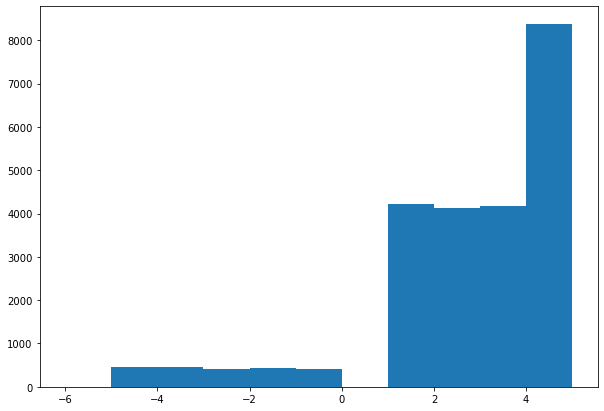

Histogram for : Rate


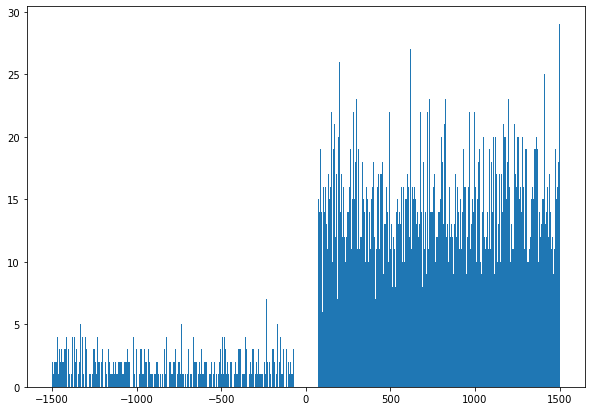

Histogram for : Tax


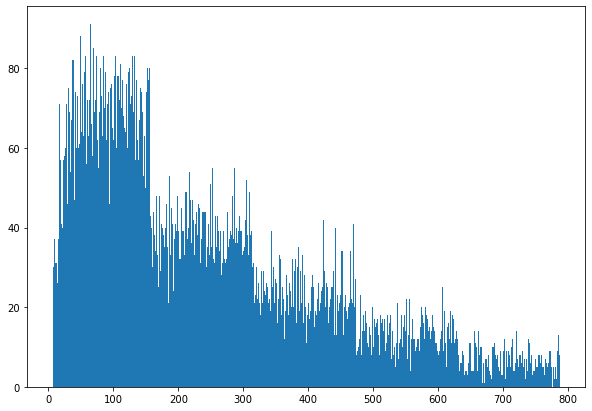

Histogram for : total_amt


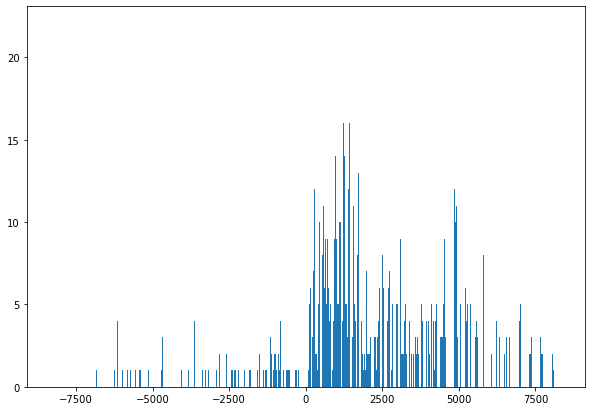

In [25]:
# Histogram for all continuous variable
for i in cont_var:
    print('Histogram for :',i)
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(Customer_Final[i], 
            bins =list(range(int(Customer_Final[i].min())-1,int(Customer_Final[i].max())+1)))
    plt.show()

frequency bar for: Gender


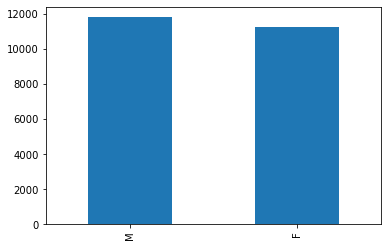

frequency bar for: city_code


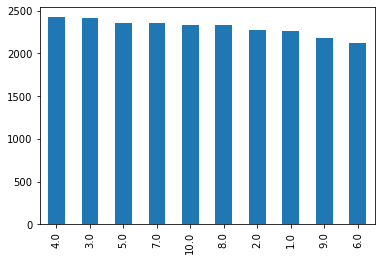

frequency bar for: prod_subcat_code


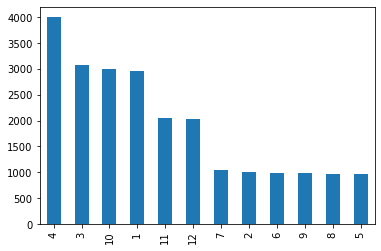

frequency bar for: prod_cat_code


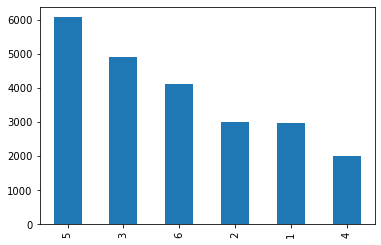

frequency bar for: Store_type


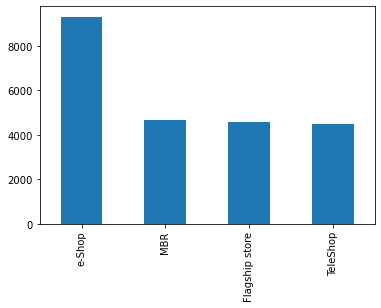

frequency bar for: prod_cat


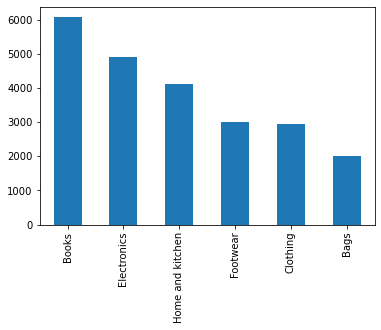

frequency bar for: prod_subcat


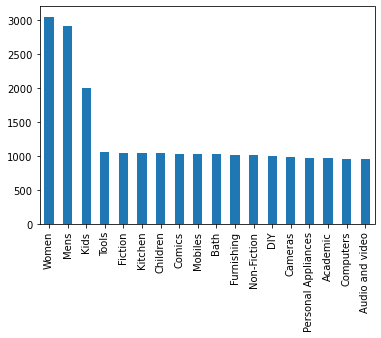

In [26]:
cat_var=['Gender','city_code','prod_subcat_code','prod_cat_code','Store_type','prod_cat','prod_subcat']
for i in cat_var:
    print('frequency bar for:',i)
    Customer_Final[i].value_counts().plot(kind='bar')
    plt.show()

### 4. Calculate the following information using the merged dataset :

In [27]:
Customer_Final.DOB

0        26-09-1981
1        26-09-1981
2        24-10-1987
3        03-02-1992
4        11-12-1971
            ...    
23048    05-11-1970
23049    02-07-1976
23050    09-03-1974
23051    06-06-1974
23052    20-03-1992
Name: DOB, Length: 23053, dtype: object

### 4 a. Time period of the available transaction data

In [28]:
Customer_Final["DOB"] = pd.to_datetime(Customer_Final["DOB"], format="%d-%m-%Y")

In [29]:
Customer_Final["tran_date"] = pd.to_datetime(Customer_Final["tran_date"])

In [30]:
min_date = Customer_Final["tran_date"].min()
max_date = Customer_Final["tran_date"].max()

In [31]:
print("Time period of the available transaction data is from "+ 
      pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + 
      pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


### 4 b. Count of transactions where the total amount of transaction was negative

In [32]:
Customer_Final[Customer_Final.total_amt<0].shape[0]

2177

### 5. Analyze which product categories are more popular among females vs male customers.

In [33]:
Customer_Final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()

,Gender,prod_cat,Qty
0,F,Bags,2362
1,F,Books,7070
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3716
5,F,Home and kitchen,4895
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6476


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [34]:
cust_6=Customer_Final.groupby(["city_code"])[["customer_Id"]].count().reset_index().sort_values(by='customer_Id',ascending =False)
cust_6

,city_code,customer_Id
3,4.0,2422
2,3.0,2411
4,5.0,2360
6,7.0,2356
9,10.0,2333
7,8.0,2330
1,2.0,2270
0,1.0,2258
8,9.0,2178
5,6.0,2127


<Figure size 576x360 with 0 Axes>

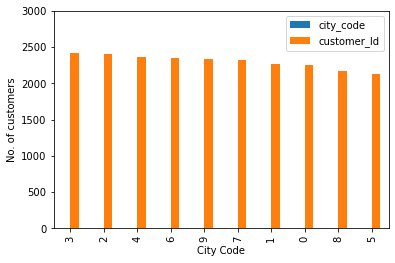

In [35]:
plt.figure(figsize=(8,5))
cust_6.plot(kind="bar")
plt.xlabel("City Code")
plt.ylabel("No. of customers")
plt.yticks(np.arange(0, 3500, step=500))
plt.show()

In [36]:
percentage = round((cust_6.loc[3,['customer_Id']] / cust_6.customer_Id.sum()) * 100,2)

In [37]:
percentage.loc['customer_Id']

10.51

In [38]:
print("City code 4.0 has the maximum customers and the percentage of customers from that city is:",percentage.loc['customer_Id'])

City code 4.0 has the maximum customers and the percentage of customers from that city is: 10.51


### 7. Which store type sells the maximum products by value and by quantity?

In [39]:
Customer_Final.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women


In [40]:
max_value=Customer_Final.groupby(['Store_type'])[['total_amt']].sum().reset_index().sort_values(by='total_amt',ascending =False)
max_value.iloc[0, 0]

'e-Shop'

In [41]:
max_qty = Customer_Final.groupby(['Store_type'])[['Qty']].sum().reset_index().sort_values(by = 'Qty', ascending=False)
max_qty.iloc[0, 0]

'e-Shop'

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [42]:
Customer_Final.loc[(Customer_Final.prod_cat == 'Electronics')|(Customer_Final.prod_cat =='Clothing') & (Customer_Final.Store_type == 'Flagship store'), 'total_amt'].sum()

11916886.865

In [43]:
Customer_Final.loc[(Customer_Final.prod_cat == 'Electronics') & (Customer_Final.Store_type == 'Flagship store'), 'total_amt'].sum()

2215136.04

In [44]:
Customer_Final.loc[(Customer_Final.prod_cat =='Clothing') & (Customer_Final.Store_type == 'Flagship store'), 'total_amt'].sum()

1194423.23

In [45]:
piv_tab = round(Customer_Final.pivot_table(index = "prod_cat",
                                               columns="Store_type", 
                                               values="total_amt", 
                                               aggfunc='sum'),2)
piv_tab

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.84,848678.67,789181.06,1616300.08
Books,2488205.85,2496039.20,2545005.06,5293443.93
Clothing,1194423.23,1287686.34,1241834.36,2527193.56
Electronics,2215136.04,2107514.56,1973338.83,4426474.19
Footwear,1234806.56,1112163.72,1235719.29,2637084.71
Home and kitchen,1712567.68,1822403.57,1579702.47,3324319.57


In [46]:
total = piv_tab.loc[["Clothing","Electronics"],"Flagship store"].sum()
print('Total amount of both Clothing and Electronics from Flagship Store:',total)

Total amount of both Clothing and Electronics from Flagship Store: 3409559.27


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [47]:
piv= round(Customer_Final.pivot_table(index='prod_cat',
                               columns='Gender',
                               values='total_amt',
                               aggfunc='sum'),2)
piv

Gender,F,M
prod_cat,,
Bags,2077985.65,2046722.99
Books,6164692.24,6645972.78
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5703109.43
Footwear,3202552.99,3014672.05
Home and kitchen,4132177.34,4301075.48


In [48]:
total = piv.loc['Electronics','M']
print('the total amount earned from "Male" customers under the "Electronics" category:',total)

the total amount earned from "Male" customers under the "Electronics" category: 5703109.43


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [49]:
Cust_pos = Customer_Final.loc[Customer_Final.total_amt>0]

In [50]:
trans_count = Cust_pos.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
trans_count

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [51]:
unique_trans_count=trans_count.groupby('customer_Id')['transaction_id'].sum().reset_index()
unique_trans_count

,customer_Id,transaction_id
0,266783,4
1,266784,3
2,266785,7
3,266788,4
4,266794,11
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [52]:
cnt=unique_trans_count.loc[unique_trans_count.transaction_id > 10,'customer_Id'].count()

In [53]:
print('There are ',cnt,'customers who have more than 10 unique transactions, excluding all transactions which have negative amounts')

There are  6 customers who have more than 10 unique transactions, excluding all transactions which have negative amounts


### 11. For all customers aged between 25 - 35, find out:
#### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [54]:
now = pd.Timestamp('now')

In [55]:
Customer_Final['AGE'] = (now - Customer_Final['DOB']).astype('<m8[Y]')

In [56]:
Customer_Final['AGE'] = Customer_Final['AGE'].astype('int')

In [57]:
Customer_Final['AGE'].max()

52

In [63]:
Customer_Final['Age_cat'] = pd.cut(Customer_Final['AGE'],
                                   bins=[24,35,46,57],
                                   labels=['25-35','36-46','47-57'],
                                   include_lowest=True)

In [69]:
piv=round(Customer_Final.pivot_table(index='prod_cat',
                          columns='Age_cat',
                          values='total_amt',
                          aggfunc='sum'),2)
piv

Age_cat,25-35,36-46,47-57
prod_cat,,,
Bags,1135536.68,1938198.73,1050973.24
Books,3432313.43,6368689.60,3021691.01
Clothing,1965896.66,2926133.93,1359106.91
Electronics,3144139.37,4991132.51,2587191.75
Footwear,1885573.10,2897566.36,1436634.81
Home and kitchen,2461357.66,4092766.41,1884869.22


In [73]:
print('Total amount spent for “Electronics” and “Books” product categories for all customers aged between 25-35:',piv.loc[['Books','Electronics'],'25-35'].sum().round(2))

Total amount spent for “Electronics” and “Books” product categories for all customers aged between 25-35: 6576452.8


### 11. For all customers aged between 25 - 35, find out: 
#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [77]:
cust_bet = Customer_Final.loc[(Customer_Final.tran_date>='2014-01-01')&(Customer_Final.tran_date<='2014-04-01')]
cust_bet.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,AGE,Age_cat
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women,40,36-46


In [82]:
tot= round(cust_bet.loc[cust_bet.Age_cat=='25-35','total_amt'].sum(),2)

In [83]:
print(' total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014:',tot)

 total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014: 487639.82
